<a href="https://colab.research.google.com/github/Abishek077/prodigy-task3/blob/main/prodigy_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/bank-additional-full.csv',delimiter=';')


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
df.duplicated().sum()

12

In [ ]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
cat_cols = df.select_dtypes(include='object').columns

In [ ]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
num_cols=df.select_dtypes(exclude='object').columns

In [ ]:
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


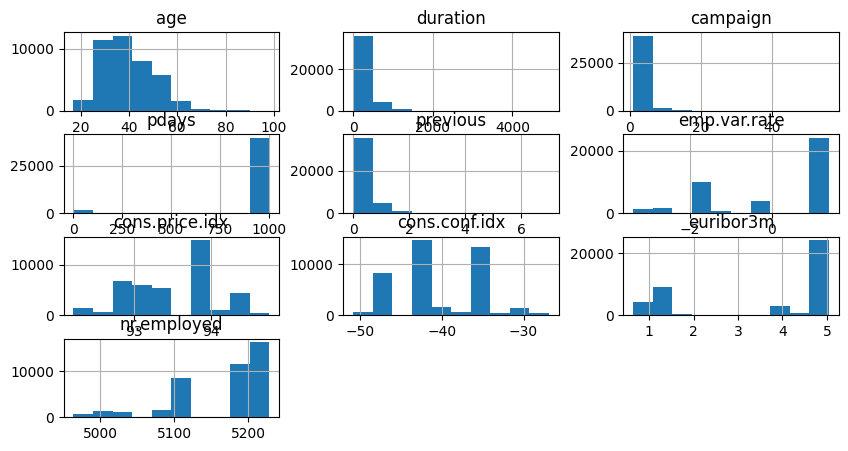

In [ ]:
df.hist(figsize=(10,5))
plt.show()

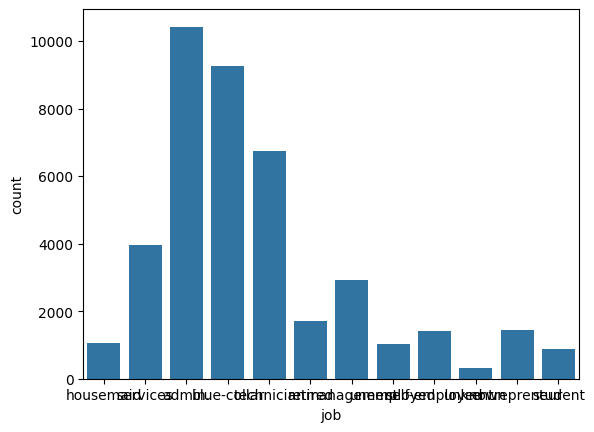

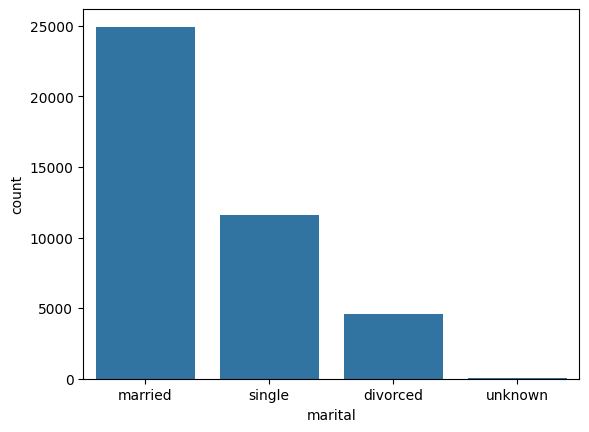

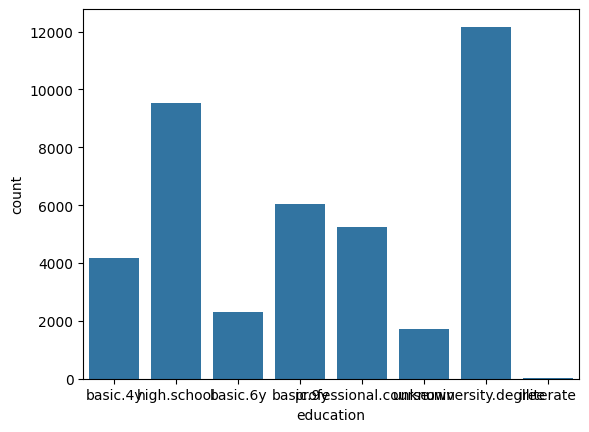

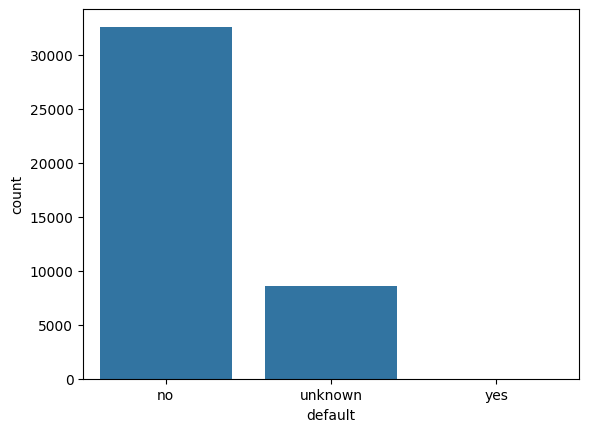

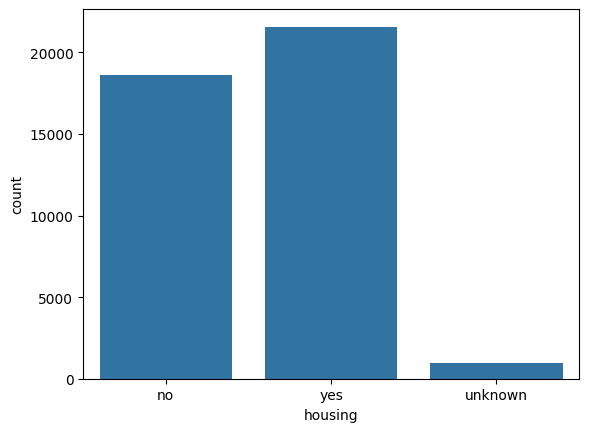

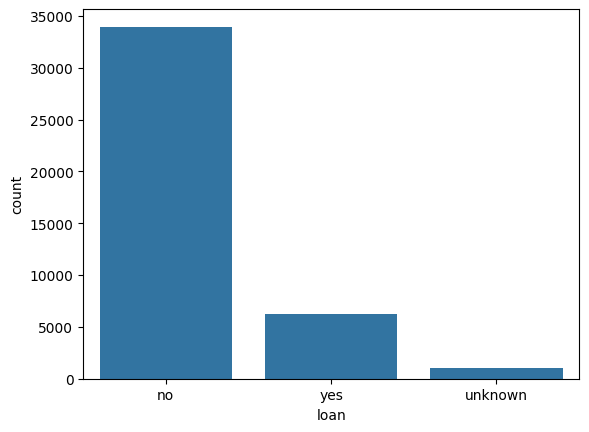

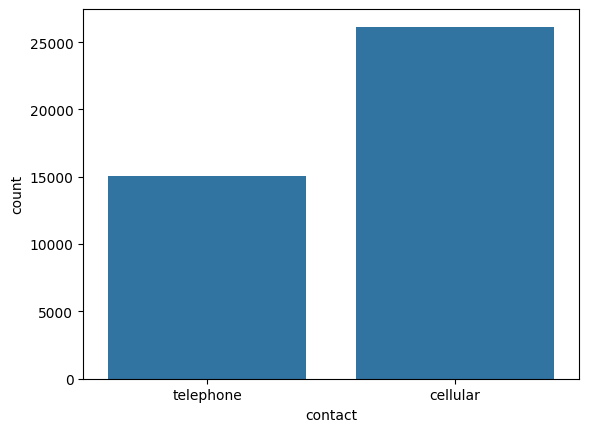

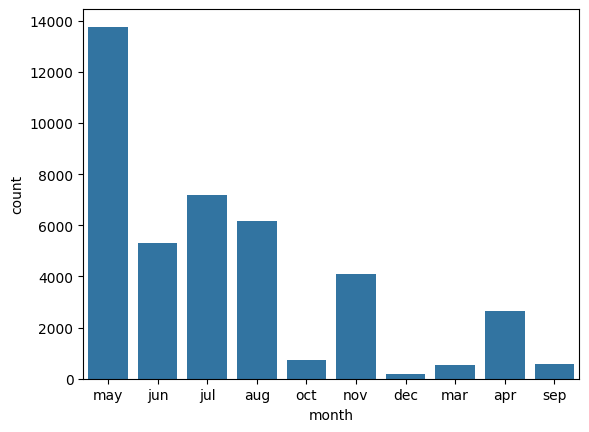

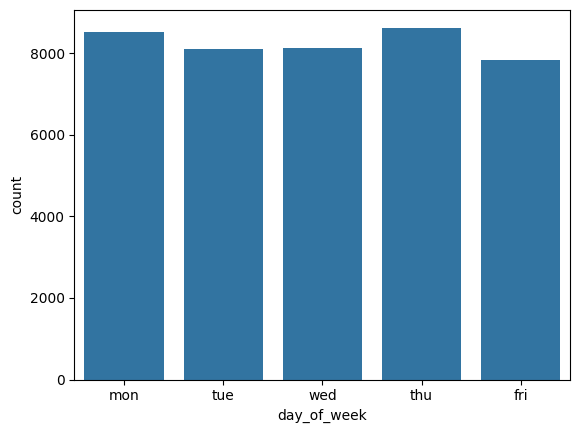

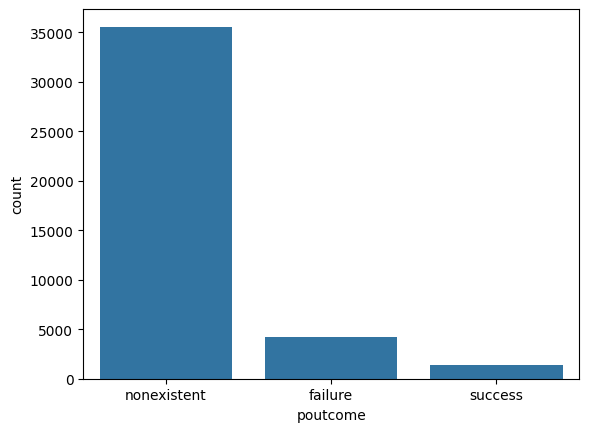

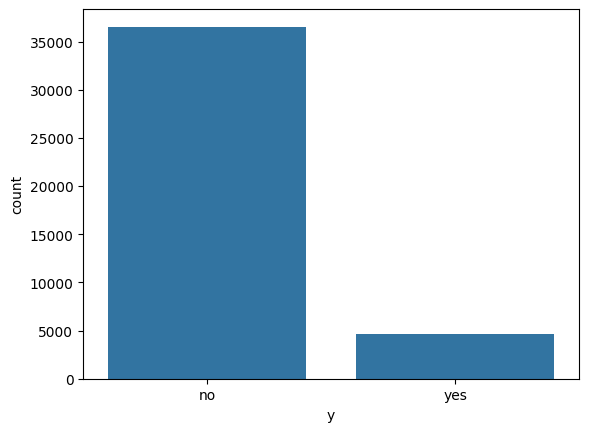

In [ ]:
#plot the cat_cols:
for i in cat_cols:
  sns.countplot(x=i,data=df)
  plt.show()

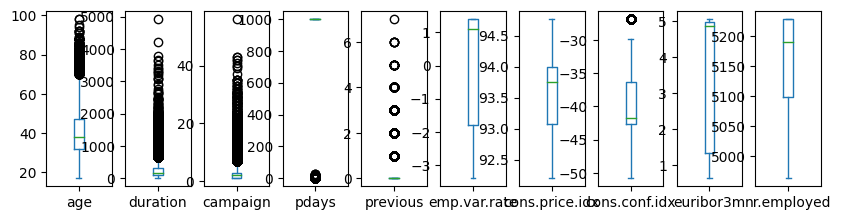

In [ ]:
df.plot(kind='box',subplots=True,layout=(2,10),figsize=(10,5))
plt.show()

In [ ]:
columns=df[['age','campaign','duration']]

In [ ]:
q1=columns.quantile(0.25)
q3=columns.quantile(0.75)
iqr=q3-q1
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

In [ ]:
df[['age','campaign','duration']]=columns[(columns<upper_limit)&(columns>lower_limit)]


In [ ]:
df[['age','campaign','duration']]

,age,campaign,duration
0,56.0,1.0,261.0
1,57.0,1.0,149.0
2,37.0,1.0,226.0
3,40.0,1.0,151.0
4,56.0,1.0,307.0
...,...,...,...
41183,NaN,1.0,334.0
41184,46.0,1.0,383.0
41185,56.0,2.0,189.0
41186,44.0,1.0,442.0


age                  Axes(0.125,0.53;0.065678x0.35)
duration          Axes(0.203814,0.53;0.065678x0.35)
campaign          Axes(0.282627,0.53;0.065678x0.35)
pdays             Axes(0.361441,0.53;0.065678x0.35)
previous          Axes(0.440254,0.53;0.065678x0.35)
emp.var.rate      Axes(0.519068,0.53;0.065678x0.35)
cons.price.idx    Axes(0.597881,0.53;0.065678x0.35)
cons.conf.idx     Axes(0.676695,0.53;0.065678x0.35)
euribor3m         Axes(0.755508,0.53;0.065678x0.35)
nr.employed       Axes(0.834322,0.53;0.065678x0.35)
dtype: object

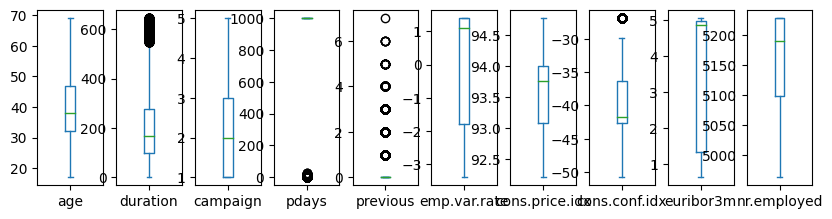

In [ ]:
df.plot(kind='box',subplots=True,layout=(2,10),figsize=(10,5))


In [ ]:
df1=df.copy()

In [ ]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df_columns=df.apply(le.fit_transform)


In [ ]:
df_columns

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,53,5,1,5,0,2,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1
41184,29,1,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,0
41185,39,5,1,6,0,2,0,0,7,0,...,1,26,0,1,5,25,0,171,0,0
41186,27,9,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1


In [ ]:
df_columns.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.001314,-0.393542,-0.115066,0.170766,-0.002217,-0.007790,0.011827,-0.026924,-0.019176,...,0.003137,-0.029958,0.016283,0.018399,0.013829,-0.000290,0.125139,-0.032758,-0.011410,0.021543
job,-0.001314,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,...,-0.006754,-0.028074,0.020965,0.011504,-0.003618,-0.016589,0.057135,-0.024999,-0.021910,0.025122
marital,-0.393542,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,...,-0.010592,-0.035746,0.038689,0.001912,-0.081916,-0.055996,-0.028307,-0.078735,-0.080046,0.046203
education,-0.115066,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,...,0.002378,-0.046559,0.038831,0.017009,-0.027874,-0.081128,0.084738,-0.057508,-0.036666,0.057799
default,0.170766,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,...,0.037034,0.078405,-0.102416,0.023417,0.188923,0.165436,0.020473,0.192971,0.175014,-0.099352
housing,-0.002217,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,...,-0.010762,-0.011882,0.021314,-0.011783,-0.055973,-0.078742,-0.028543,-0.041340,-0.036002,0.011552
loan,-0.007790,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,...,0.011721,-0.000615,-0.001327,-0.001511,0.001298,-0.001966,-0.011559,0.005135,0.005483,-0.004909
contact,0.011827,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,...,0.071604,0.116108,-0.212848,0.118744,0.350211,0.584524,0.243212,0.273937,0.175940,-0.144773
month,-0.026924,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,...,-0.063699,-0.047419,0.103157,-0.065012,-0.188273,-0.006372,-0.018749,-0.197147,-0.266983,-0.006065
day_of_week,-0.019176,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,...,-0.051073,-0.010467,-0.004102,0.018732,0.035915,0.002174,0.035237,0.023488,0.023271,0.015967


In [ ]:
X=df_columns.drop('y',axis=1)

In [ ]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,53,5,1,5,0,2,0,0,7,0,334,0,26,0,1,5,25,0,171,0
41184,29,1,1,5,0,0,0,0,7,0,383,0,26,0,1,5,25,0,171,0
41185,39,5,1,6,0,2,0,0,7,0,189,1,26,0,1,5,25,0,171,0
41186,27,9,1,5,0,0,0,0,7,0,442,0,26,0,1,5,25,0,171,0


In [ ]:
Y=df_columns['y']

In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape

(30891, 20)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy Score:")
print(accuracy_score(Y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))


Accuracy Score:
0.9134699427017577

Confusion Matrix:
[[8921  223]
 [ 668  485]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9144
           1       0.69      0.42      0.52      1153

    accuracy                           0.91     10297
   macro avg       0.81      0.70      0.74     10297
weighted avg       0.90      0.91      0.90     10297



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [ ]:
y_pred1 = dt.predict(X_test)

In [ ]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print("Accuracy Score:")
print(accuracy_score(Y_test, y_pred1))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred1))
print("\nClassification Report:")
print(classification_report(Y_test, y_pred1))

Accuracy Score:
0.9134699427017577

Confusion Matrix:
[[8921  223]
 [ 668  485]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9144
           1       0.69      0.42      0.52      1153

    accuracy                           0.91     10297
   macro avg       0.81      0.70      0.74     10297
weighted avg       0.90      0.91      0.90     10297



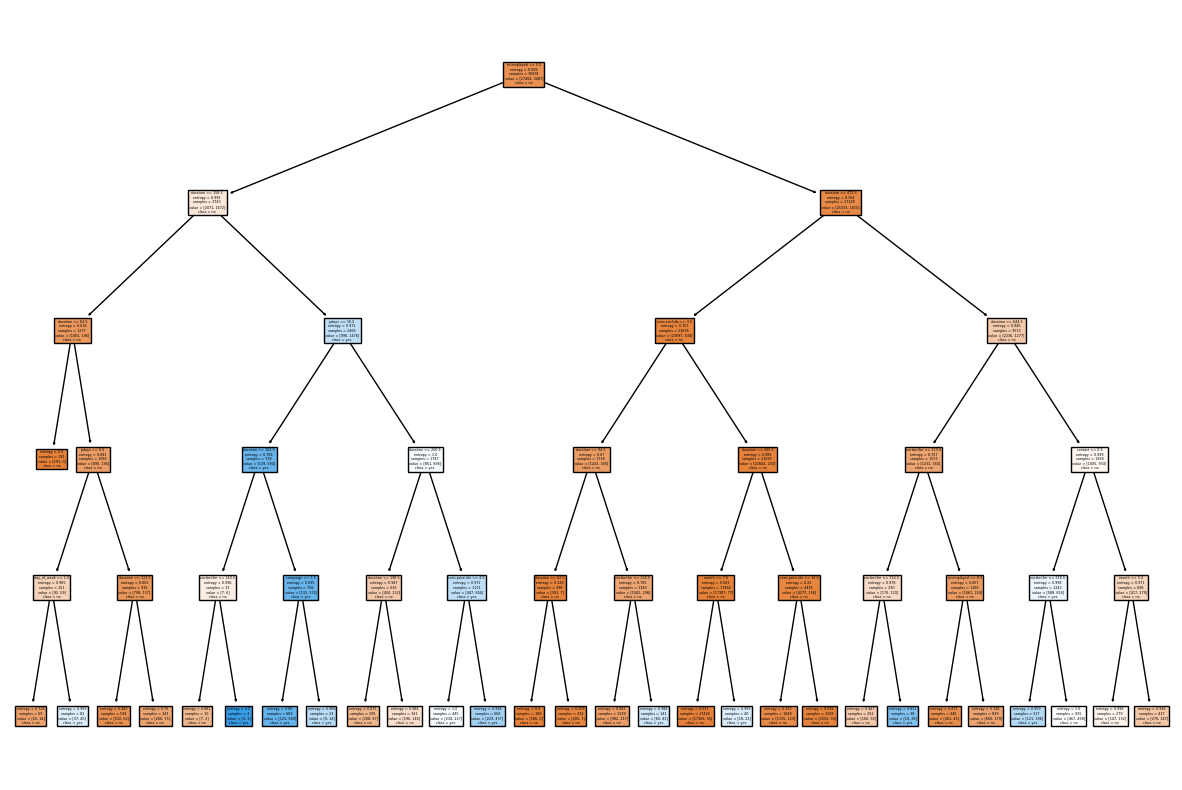

In [ ]:
from sklearn.tree import plot_tree
cn=['no','yes']
fn=X_train.columns
plt.figure(figsize=(15,10))
plot_tree(dt, class_names=cn, feature_names=fn, filled=True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
dt1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [ ]:
y_pred2 = dt1.predict(X_test)

In [ ]:
print("Accuracy Score:")
print(accuracy_score(Y_test, y_pred2))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred2))
print("\nClassification Report:")
print(classification_report(Y_test, y_pred2))

Accuracy Score:
0.9124987860541905

Confusion Matrix:
[[8877  267]
 [ 634  519]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9144
           1       0.66      0.45      0.54      1153

    accuracy                           0.91     10297
   macro avg       0.80      0.71      0.74     10297
weighted avg       0.90      0.91      0.91     10297



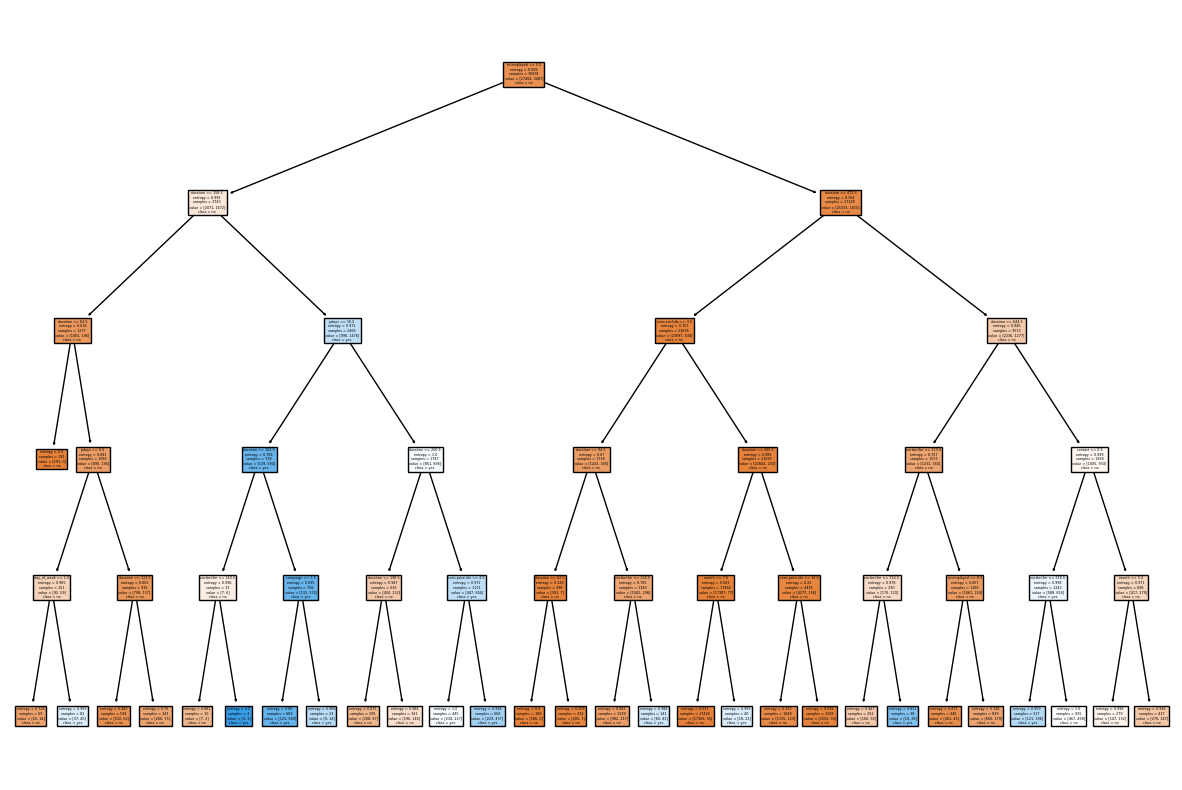

In [ ]:
from sklearn.tree import plot_tree
cn=['no','yes']
fn=X_train.columns
plt.figure(figsize=(15,10))
plot_tree(dt1, class_names=cn, feature_names=fn, filled=True)
plt.show()

In [ ]:
import pandas as pd


results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree(gini)','Decision Tree(entropy)'],
    'Score': [0.913,0.913,0.912]
})


results = results.sort_values(by='Score', ascending=False)


results.set_index('Score', inplace=True)


print(results.head(9))

                        Model
Score                        
0.913     Logistic Regression
0.913     Decision Tree(gini)
0.912  Decision Tree(entropy)
